In [1]:
import xpress as xp
xp.controls.outputlog = 0 # turn off output log

import numpy as np
import pylab as pl

In [2]:
# Define weight and values of the knapsack items
n_items = 8

weights = np.array([1, 7, 4, 3, 5, 6, 2, 7])
ratings = np.array([2, 9, 3, 8, 10, 6, 2, 10])
availabilities = np.array([4, 2, 3, 2, 1, 1, 3, 1])

In [3]:
knapsack = xp.problem()

In [4]:
x = np.array([xp.var(vartype=xp.integer, lb=0) for _ in range(n_items)], dtype=xp.npvar)
knapsack.addVariable(x)

In [5]:
weight_constraint = xp.Sum(weights[i]*x[i] for i in range(n_items)) <= 15
knapsack.addConstraint(weight_constraint)

In [7]:
[knapsack.addConstraint(x[i] <= availabilities[i]) for i in range(n_items)]

[None, None, None, None, None, None, None, None]

In [9]:
objective = xp.Sum(ratings[i]*x[i] for i in range(n_items))
knapsack.setObjective(objective, sense=xp.maximize)

In [10]:
knapsack.solve()

In [11]:
knapsack.getProbStatusString()

'mip_optimal'

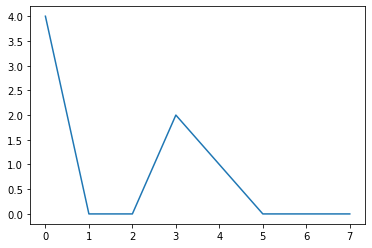

In [12]:
pl.plot(knapsack.getSolution())

In [13]:
# Print knapsack solution
_ = [print(var, value) for var, value in zip(x, knapsack.getSolution())]

knapsack.getObjVal()

C1 4.0
C2 -0.0
C3 -0.0
C4 2.0
C5 1.0
C6 -0.0
C7 -0.0
C8 0.0


34.0